In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/badrinathsanagavaram/Desktop/Election Data Analysis/Data/transformed-data/2024-transformed-data.csv')
df.head(5)

,Unnamed: 0,State,Name,Type,Winning Candidate,Winning Party,Winning Percentage,Winner's Votes,Runner Up Candidate,Runner Up Party,Runner Up Percentage,Runner Up Votes,Margin %,Margin Votes
0,0,Andhra Pradesh,Srikakulam,OC,Kinjarapu Ram Mohan Naidu,TDP,61,754328,Perada Tilak,YSRCP,34,426427,26,327901
1,1,Andhra Pradesh,Vizianagaram,OC,Appalanaidu Kalisetti,TDP,57,743113,Bellana Chandra Sekhar,YSRCP,38,493762,19,249351
2,2,Andhra Pradesh,Visakhapatnam,OC,Mathukumilli Bharat,TDP,65,907467,Botsa Jhansi Lakshmi,YSRCP,29,403220,36,504247
3,3,Andhra Pradesh,Anakapalli,OC,C. M. Ramesh,BJP,57,762069,Budi Mutyala Naidu,YSRCP,35,465539,22,296530
4,4,Andhra Pradesh,Kakinada,OC,Tangella Uday Srinivas,JSP,54,729699,Chalamalasetti Sunil,YSRCP,37,500208,17,229491


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df.dtypes

State                   object
Name                    object
Type                    object
Winning Candidate       object
Winning Party           object
Winning Percentage       int64
Winner's Votes           int64
Runner Up Candidate     object
Runner Up Party         object
Runner Up Percentage     int64
Runner Up Votes          int64
Margin %                 int64
Margin Votes             int64
dtype: object

In [6]:
df.columns

Index(['State', 'Name', 'Type', 'Winning Candidate', 'Winning Party',
       'Winning Percentage', 'Winner's Votes', 'Runner Up Candidate',
       'Runner Up Party', 'Runner Up Percentage', 'Runner Up Votes',
       'Margin %', 'Margin Votes'],
      dtype='object')

## Percentage of Valid Votes Polled in the General Election 2024

In [5]:
total_number_of_winner_votes = df['Winner\'s Votes'].sum()
total_number_of_runner_up_votes = df['Runner Up Votes'].sum()
total_number_of_votes_polled = total_number_of_runner_up_votes + total_number_of_winner_votes
total_number_of_votes_polled

564805721

In [6]:
registered_voters_in_2024 = 977965560
voting_percentage = (total_number_of_votes_polled/registered_voters_in_2024) * 100
voting_percentage

57.75312997729694

In [7]:
state_wise_votes = df.groupby('State')[['Winner\'s Votes', 'Runner Up Votes']].sum().reset_index()

In [8]:
state_wise_votes['Total_votes_polled_for_2_parties'] = state_wise_votes['Winner\'s Votes'] + state_wise_votes['Runner Up Votes']

## What is the percentage of Votes per State

In [9]:
eligible_voters_2024_by_state = {
    "Andaman and Nicobar Islands": 315745,
    "Andhra Pradesh": 41401887,
    "Arunachal Pradesh": 898442,
    "Assam": 24572114,
    "Bihar": 77259579,
    "Chandigarh": 660552,
    "Chhattisgarh": 20678667,
    "Dadra and Nagar Haveli and Daman and Diu": 417236,
    "Goa": 1179644,
    "Gujarat": 48009945,
    "Haryana": 20187911,
    "Himachal Pradesh": 5711969,
    "Jammu and Kashmir": 8802348,
    "Jharkhand": 25877892,
    "Karnataka": 54772332,
    "Kerala": 27807008,
    "Ladakh": 190576,
    "Lakshadweep": 57953,
    "Madhya Pradesh": 56668852,
    "Maharashtra": 93061760,
    "Manipur": 2051357,
    "Meghalaya": 2230451,
    "Mizoram": 861327,
    "Nagaland": 1325383,
    "Delhi": 15214638,
    "Odisha": 33716965,
    "Puducherry": 1024024,
    "Punjab": 21567196,
    "Rajasthan": 53508010,
    "Sikkim": 466643,
    "Tamil Nadu": 62404947,
    "Telangana": 33232318,
    "Tripura": 2870896,
    "Uttar Pradesh": 154403112,
    "Uttarakhand": 8431101,
    "West Bengal": 76124780
}
state_wise_votes.head(5)

,State,Winner's Votes,Runner Up Votes,Total_votes_polled_for_2_parties
0,Andaman and Nicobar Islands,102436,78040,180476
1,Andhra Pradesh,18242107,13112124,31354231
2,Arunachal Pradesh,350998,219839,570837
3,Assam,10686721,6942378,17629099
4,Bihar,20193954,16222309,36416263


In [10]:
state_wise_votes['eligible_voters_2024'] = state_wise_votes['State'].map(eligible_voters_2024_by_state)

In [11]:
state_wise_votes['percentage_votes_polled'] = (state_wise_votes['Total_votes_polled_for_2_parties']/state_wise_votes['eligible_voters_2024']) * 100
filt =state_wise_votes['State'] == 'Ladakh'
state_wise_votes.loc[filt, ['State', 'percentage_votes_polled']]

,State,percentage_votes_polled
17,Ladakh,53.866174


## Top 5 States with Higest voting polling percentage for the 2 parties : 
### The below list indicates that the compitition in these 5 states is mostly between only 2 Parties and there is no 3rd Political alternative

,State,percentage_votes_polled
18,Lakshadweep,84.214795
32,Tripura,77.299178
1,Andhra Pradesh,75.731406
3,Assam,71.744332
26,Puducherry,69.870823


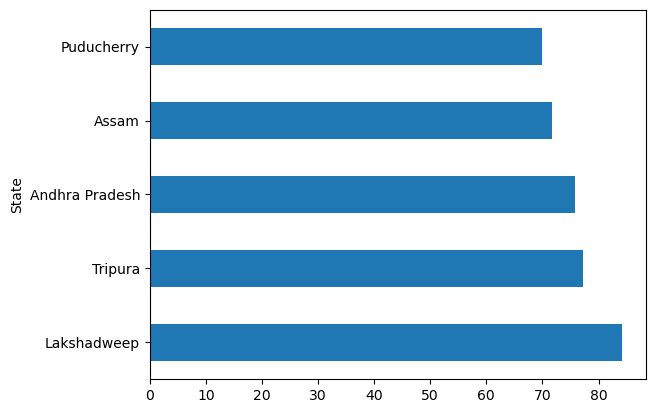

In [12]:
state_wise_votes[['State', 'percentage_votes_polled']].sort_values(by='percentage_votes_polled', ascending=False).set_index('State').head(5).plot(kind='barh', legend=False)
state_wise_votes[['State', 'percentage_votes_polled']].sort_values(by='percentage_votes_polled', ascending=False).head(5)

## What are the number of seats won by each party

<Axes: ylabel='count'>

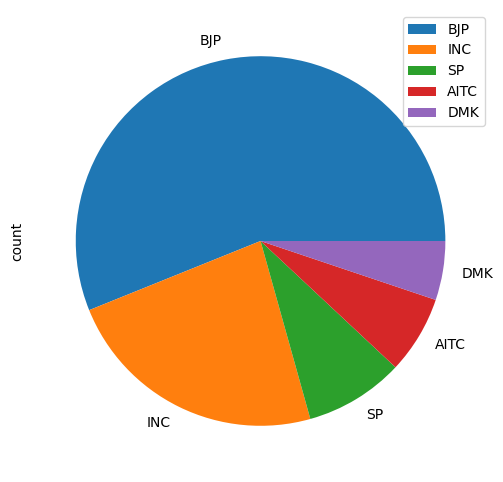

In [ ]:
pd.set_option('Display.max_rows', 50)
df.groupby('Winning Party')['Winning Party'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False).set_index('Winning Party').head(5).plot(kind = 'pie', y = 'count' ,x = 'Winning Party' , figsize = (10,6), legend = 'count')

<Axes: ylabel='Winning Party'>

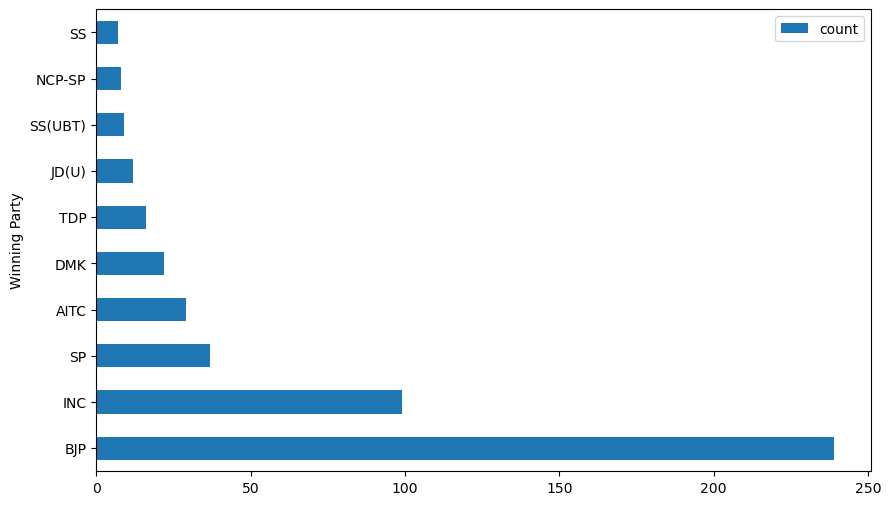

In [ ]:
df.groupby('Winning Party')['Winning Party'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False).set_index('Winning Party').head(10).plot(kind = 'barh' , figsize = (10,6), legend = 'False')

<Axes: xlabel='Margin %', ylabel='Winning Percentage'>

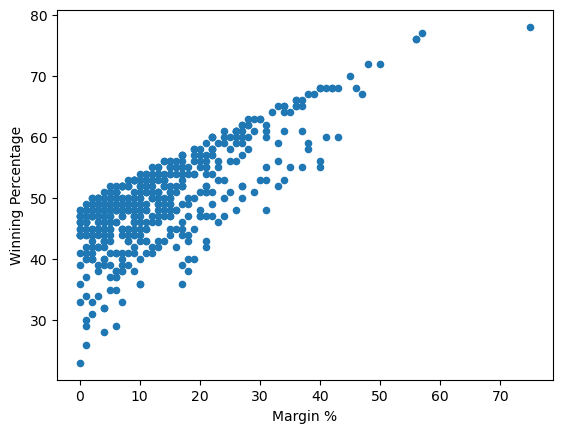

In [33]:
df[['Margin %', 'Winning Percentage']].plot(kind='scatter', x= 'Margin %', y = 'Winning Percentage')

In [35]:
df[['State', 'Name', 'Winning Candidate' ,'Winning Party','Margin Votes', 'Margin %']].sort_values(by = 'Margin Votes', ascending= False).head(5)

,State,Name,Winning Candidate,Winning Party,Margin Votes,Margin %
218,Madhya Pradesh,Indore,Shankar Lalwani,BJP,1175092,75
25,Assam,Dhubri,Rakibul Hussain,INC,1012476,41
210,Madhya Pradesh,Vidisha,Shivraj Singh Chouhan,BJP,821408,56
117,Gujarat,Navsari,C. R. Patil,BJP,773551,57
99,Gujarat,Gandhinagar,Amit Shah,BJP,744716,56


## Top states with highest vote margins.

In [40]:
df.groupby('State')['Margin %'].median().reset_index().sort_values(by= 'Margin %', ascending= False).head(5)

,State,Margin %
32,Tripura,46.0
22,Meghalaya,29.0
10,Gujarat,29.0
19,Madhya Pradesh,27.0
34,Uttarakhand,26.0


<Axes: ylabel='State'>

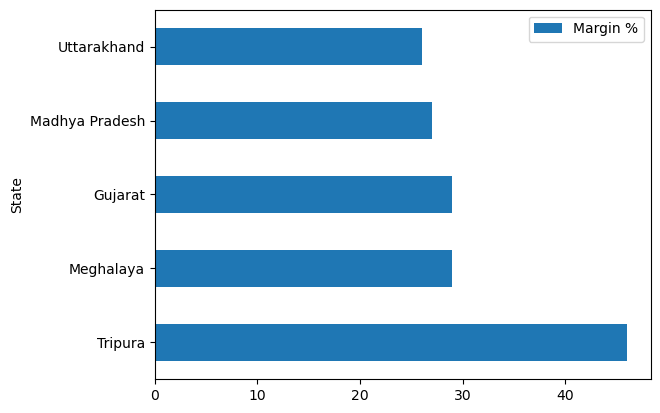

In [42]:
df.groupby('State')['Margin %'].median().reset_index().sort_values(by= 'Margin %', ascending= False).set_index('State').head(5).plot(kind= "barh")

## Identify close contests (margin % < 5).

In [48]:
filt = df['Margin %'] <= 5
df['State'].loc[filt].value_counts()

State
Uttar Pradesh     39
West Bengal       19
Maharashtra       17
Bihar             11
Rajasthan         10
Karnataka         10
Punjab             8
Chhattisgarh       6
Haryana            6
Odisha             6
Andhra Pradesh     5
Tamil Nadu         5
Telangana          4
Kerala             4
Madhya Pradesh     2
Assam              2
Gujarat            2
Jharkhand          1
Goa                1
Chandigarh         1
Lakshadweep        1
Name: count, dtype: int64

<Axes: ylabel='State'>

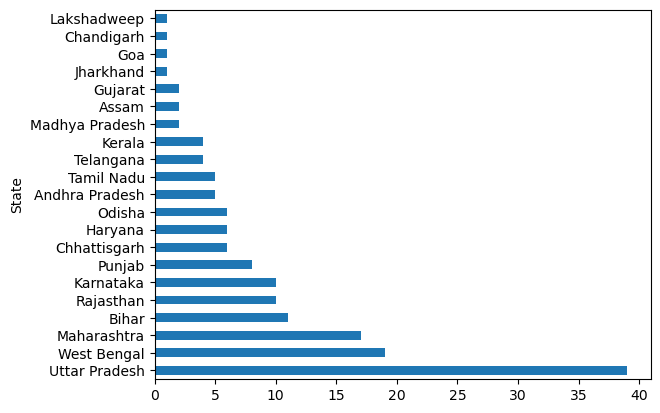

In [54]:
df['State'].loc[filt].value_counts().plot(kind='barh')

In [59]:
filt = (df['Margin %'] <=5)
df['Winning Party'].loc[filt].sort_values(ascending=False).value_counts()

Winning Party
BJP            65
INC            36
SP             17
AITC            9
YSRCP           4
DMK             4
NCP-SP          3
SS              3
CPI(M)          2
JD(U)           2
AAP             2
SS(UBT)         2
UPPL            1
RJD             1
JD(S)           1
Independent     1
RLD             1
RLP             1
CPI(ML)L        1
SAD             1
TDP             1
AD(S)           1
JMM             1
Name: count, dtype: int64

<Axes: ylabel='Winning Party'>

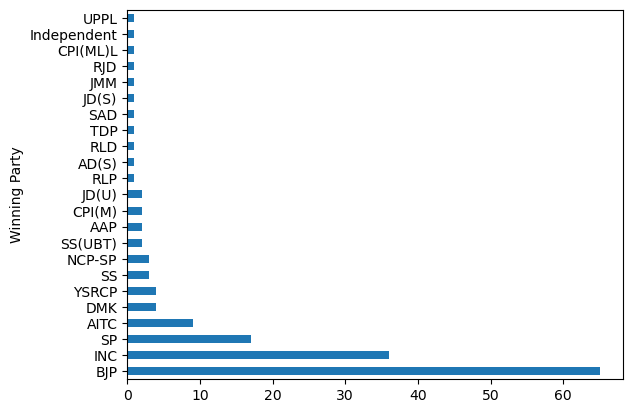

In [58]:
df['Winning Party'].loc[filt].value_counts().sort_values(ascending=False).plot(kind='barh')

## Seats Won by Party By Reserved Seats

In [95]:
pd.set_option('display.max_rows', 90)
filt = (df['Winning Party'] == 'BJP') | (df['Winning Party'] == 'INC')
df.loc[filt].groupby(['Winning Party', 'Type']).size().reset_index(name='Count').sort_values(by=['Count','Type', 'Winning Party'], ascending=False)

,Winning Party,Type,Count
0,BJP,OC,181
3,INC,OC,67
1,BJP,SC,32
2,BJP,ST,26
4,INC,SC,19
5,INC,ST,13


<Axes: ylabel='Type'>

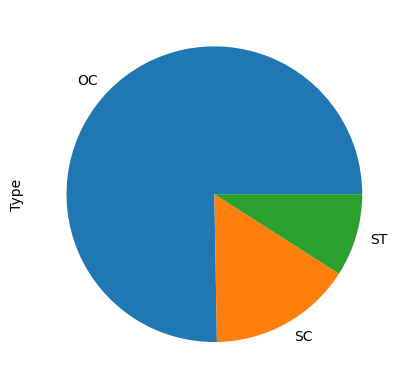

In [93]:
df.groupby('Type')['Type'].count().plot(kind= 'pie', y='Type')

In [105]:
parties_list = list(pd.unique(df[['Winning Party', 'Runner Up Party']].values.ravel()))
print(parties_list)

['TDP', 'YSRCP', 'BJP', 'JSP', 'INC', 'AIUDF', 'AGP', 'IND', 'AJP', 'VIP', 'JD(U)', 'RJD', 'Independent', 'LJP(RV)', 'CPI', 'CPI(M)', 'CPI(ML)L', 'HAM(S)', 'AAP', 'JKNC', 'JKPDP', 'JMM', 'AJSU', 'JD(S)', 'IUML', 'KEC', 'KC(M)', 'RSP', 'BSP', 'SS(UBT)', 'NCP-SP', 'SS', 'RSPS', 'AIMIM', 'NCP', 'NPF', 'NPP', 'BJD', 'SAD', 'RLP', 'BAP', 'DMK', 'AIADMK', 'PMK', 'VCK', 'MDMK', 'DMDK', 'AMMK', 'BRS', 'SP', 'RLD', 'ASP(KR)', 'SBSP', 'AITC', 'AD(S)', 'UPPL', 'BPF', 'VPP', 'ZPM', 'MNF', 'NDPP', 'SKM', 'Citizen Action Party (Sikkim)']


In [109]:
party_alliance = {
    'TDP': 'NDA',
    'YSRCP': 'Others',
    'BJP': 'NDA',
    'JSP': 'NDA',
    'INC': 'INDIA',
    'AIUDF': 'INDIA',
    'AGP': 'NDA',
    'IND': 'Others',
    'AJP': 'INDIA',
    'VIP': 'Others',
    'JD(U)': 'NDA',
    'RJD': 'INDIA',
    'Independent': 'Others',
    'LJP(RV)': 'NDA',
    'CPI': 'INDIA',
    'CPI(M)': 'INDIA',
    'CPI(ML)L': 'INDIA',
    'HAM(S)': 'NDA',
    'AAP': 'INDIA',
    'JKNC': 'INDIA',
    'JKPDP': 'INDIA',
    'JMM': 'INDIA',
    'AJSU': 'NDA',
    'JD(S)': 'NDA',
    'IUML': 'INDIA',
    'KEC': 'INDIA',
    'KC(M)': 'INDIA',
    'RSP': 'INDIA',
    'BSP': 'Others',
    'SS(UBT)': 'INDIA',
    'NCP-SP': 'INDIA',
    'SS': 'NDA',
    'RSPS': 'Others',
    'AIMIM': 'Others',
    'NCP': 'NDA',
    'NPF': 'NDA',
    'NPP': 'NDA',
    'BJD': 'Others',
    'SAD': 'NDA',
    'RLP': 'NDA',
    'BAP': 'Others',
    'DMK': 'INDIA',
    'AIADMK': 'NDA',
    'PMK': 'NDA',
    'VCK': 'INDIA',
    'MDMK': 'INDIA',
    'DMDK': 'Others',
    'AMMK': 'Others',
    'BRS': 'Others',
    'SP': 'INDIA',
    'RLD': 'INDIA',
    'ASP(KR)': 'Others',
    'SBSP': 'NDA',
    'AITC': 'INDIA',
    'AD(S)': 'INDIA',
    'UPPL': 'NDA',
    'BPF': 'INDIA',
    'VPP': 'Others',
    'ZPM': 'Others',
    'MNF': 'NDA',
    'NDPP': 'NDA',
    'SKM': 'NDA',
    'Citizen Action Party (Sikkim)': 'Others'
}

In [110]:
df['Alliance'] = df['Winning Party'].map(party_alliance)

## Seats Won by Alliance and also by type

<Axes: ylabel='Type'>

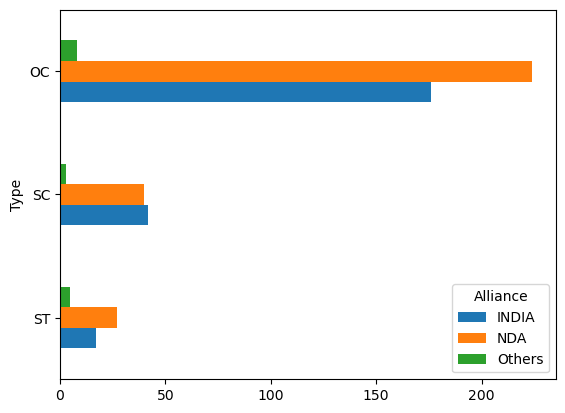

In [142]:
df.groupby(['Alliance','Type'])['Type'].count().reset_index(name='Count').pivot(index='Type', columns='Alliance', values='Count').fillna(0).sort_values(by='Type', ascending=False).plot(kind='barh')

In [114]:
df.groupby('Alliance')['Alliance'].value_counts()

Alliance
INDIA     235
NDA       291
Others     16
Name: count, dtype: int64